# Блок №4

In [1]:
# Импор необходимыз библиотек
import pandas as pd
import os
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Задание 1
___
В переменной `df` находится датафрэйм. Запишите в переменную  `df_shape` строку с информацией о том, сколько строк и столбцов он содержит, в следующем виде:
```
'df has y rows and x columns'
```
где y — число строк, а x — число колонок.

Ответ:
```
df_shape = f'df has {df.shape[0]} rows and {df.shape[1]} columns'
```

# Задание 2
___
Сохраните в переменную `na_number` серию, в которой для каждой колонки будет указано, сколько пропущенных значений она содержит. Например, для такого датафрейма:
![](https://ucarecdn.com/e1075ffd-190a-4019-a1fa-456e4b26bb8a/)
Ответ будет:
![](https://ucarecdn.com/63f7129e-9e87-4437-b9e5-b267258ad5f2/)

In [4]:
# Создадим тестовый датафрейм
df = pd.DataFrame(dict(age=[5, 6, np.NaN],
                   born=[pd.NaT, pd.Timestamp('1939-05-27'),
                         pd.Timestamp('1940-04-25')],
                   name=['Alfred', 'Batman', ''],
                   toy=[None, 'Batmobile', 'Joker']))

df

,age,born,name,toy
0,5.0,NaT,Alfred,None
1,6.0,1939-05-27,Batman,Batmobile
2,NaN,1940-04-25,,Joker


In [6]:
# Посмотрим на количество пустых значений
df.isna().sum()

age     1
born    1
name    0
toy     1
dtype: int64

Ответ:
```
na_number = df.isna().sum()
```

# Задание 3
___
Сохраните в переменную `df_types типы` данных каждой колонки датафрэйма `df`.

Ответ:
```
df_types = df.dtypes
```

# Задание 4
___
Внезапно оказалось, что в колонке `age` значения хранятся в виде строк! Поменяйте тип значений на целочисленный в этой колонке датафрэйма `df`.

Ответ:
```
df.age = df.age.astype('int')
```

# Задание 5
___
Как выяснилось, для дальнейшего анализа нам не понадобятся колонки `sex` и `age` – удалите их из датафрэйма.

Ответ:
```
df = df.drop(columns=['sex','age'])
```

# Задание 6
___
А теперь проверим, есть ли в нашей таблице `df` дубликаты по полю `client_id`. Сохраните в переменную `df` датафрейм, в котором не будет дубликатов по колонке `client_id`, оставив первую строку с `id`

Ответ:
```
df = df.drop_duplicates(subset=['client_id'])
```

# Задание 7
___
В списке `numbers` содержатся числа. Добавьте через цикл в список `positive_numbers` положительные числа из `numbers`. Если вам попался 0, то нужно прекратить этот цикл.

Например,
```
numbers = [1, -2, 3, 0, -3, 2]
```
Тогда `positive_numbers` должен быть:
```
positive_numbers = [1, 3]
```

In [7]:
numbers = [1, -2, 3, 0, -3, 2]

In [8]:
positive_numbers = []

In [9]:
for i in numbers:
    if i == 0:
        break
    if i > 0:
        positive_numbers.append(i)

In [10]:
positive_numbers

[1, 3]

# Задание 8
___
Продолжим анализ данных по поездкам на такси из Перу (данные можно скачать [здесь](https://disk.yandex.ru/d/5OUzhWvyi0n1DA)). В предыдущем уроке вы изучили распределения оценок водителей и клиентов. Теперь посмотрим на колонки со временем!

Ссылка на датасет находится в переменной `path_to_file`. Сохраните данные в переменную `taxi`, разделитель — `;`.

Затем приведите столбцы `start_at`,`end_at`, `arrived_at` к формату даты, используя `pd.to_datetime()`. Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" или "reserved" (`start_type`) .

In [11]:
# Путь к файлу на локальном компьютере
path_to_file ='3_taxi_peru.csv'

In [12]:
# Считаем данные и отфильтруем их, одновременно распарсим колонки со временем
taxi = pd.read_csv(path_to_file, sep=';',  parse_dates=['start_at', 'end_at', 'arrived_at']) \
    .query('start_type == "asap" or start_type == "reserved"')

In [14]:
# Посмотрим на получившиеся данные
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


# Задание 9
___
Создайте колонку `wait_time`, в которой будет храниться разница между временем подачи машины (`arrived_at`) и временем заказа (`start_at`) в минутах.

Чтобы сконвертировать полученный результат в минуты, можно использовать метод  `.astype('timedelta64[m]')`.

In [24]:
# Произведем вычитаение колонок и перевод в формат минут
taxi['wait_time'] = taxi.arrived_at \
                        .sub(taxi.start_at) \
                        .astype('timedelta64[m]')

In [25]:
# Посмотрим на получившуюся колонку
taxi.wait_time

0        18.0
1         NaN
2         NaN
3         NaN
4        -5.0
         ... 
23106     0.0
23107    13.0
23108     9.0
23109    -7.0
23110     NaN
Name: wait_time, Length: 23091, dtype: float64

Задание 10
___
Посмотрим, какие водители опаздывали на заказы к определенному времени (`start_type == 'reserved'`). Опозданием считается время ожидания `wait_time > 0.0`.

Сгруппируйте отфильтрованные данные по `driver_id` и в качестве ответа укажите id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз

In [28]:
# Для каждого водителя посчитаем количество опозданий на зказ к определенному времени
taxi_bad_driver = taxi.query('start_type == "reserved" and wait_time > 0.0') \
                        .groupby('driver_id') \
                        .agg({'start_type': 'count'}) \

In [32]:
# Посмотрим на получившиеся данные
taxi_bad_driver.head()

,start_type
driver_id,
0aa51cbf1d21c8c6462dbf0e10028a07,8
0fd4a08189ac948f6beaa2d314c6a7ea,2
1083bcecf6e3df9df65525ec3a66b5fb,6
1238e44402a93366489cbff9884d463c,4
12c472dd8efc6ed622ae8669251b82f1,4


In [37]:
# Получим id водителя, который опоздал больше всего раз
taxi_bad_driver.idxmax().start_type

'406921adcca37705ef527b4246c0cfea'

In [36]:
# Еще один способ решения задания
# taxi.query('start_type == "reserved" and wait_time > 0.0') \
#     .groupby('driver_id') \
#     .driver_id \
#     .count() \
#     .idxmax()

driver_id
0aa51cbf1d21c8c6462dbf0e10028a07     8
0fd4a08189ac948f6beaa2d314c6a7ea     2
1083bcecf6e3df9df65525ec3a66b5fb     6
1238e44402a93366489cbff9884d463c     4
12c472dd8efc6ed622ae8669251b82f1     4
                                    ..
fa5c3d1ad73379ba86b960210e63d537     1
fb81277200c0aea311ad85f90d548d5a     6
fdba41f4b66d90ed7863fce32b97a19f     1
ff5c924e0b630fd7c019a4234059081c     5
ff5c924e0b630fd7c019a4234059fdf4    42
Name: driver_id, Length: 105, dtype: int64

# Задание10
___
Подумайте, что может влиять на число опозданий из прошлого задания 🤔
Выберите правильный вариант ответа:
+ Цвет машины
+ Число взятых заказов
+ Поставленная водителем оценка клиента
+ Пунктуальность водителя

Ответ:
+ Число взятых заказов
+ Пунктуальность водителя

# Задание 11
___
Добавьте столбец `month`, где будет храниться месяц, в котором был сделан заказ (`start_at`), как номер, и столбец `weekday` – название дня недели. 

In [39]:
# Зададим колонку с номером месяца
taxi['month'] = taxi.start_at.dt.month

In [41]:
taxi.month.head()

0    11
1     6
2     5
3     6
4     9
Name: month, dtype: int64

In [43]:
# Зададим колонку с названием дня недели
taxi['weekday'] = taxi.start_at.dt.strftime('%A')

In [44]:
taxi.weekday.head()

0     Tuesday
1     Tuesday
2      Monday
3     Tuesday
4    Saturday
Name: weekday, dtype: object

In [45]:
# Посмотрим на общий результат
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,11,Tuesday
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,5,Monday
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0,9,Saturday


# Задание 12
___
Постройте график числа заказов по месяцам (`month`). Подумайте, с чем может быть связана полученная картина. 

Вопрос: в каком летнем месяце было сделано наименьшее число заказов? В качестве ответа введите номер месяца (6, 7 или 8). 

In [46]:
# Найдем ответ на задачу
taxi.query('month in [6, 7, 8]') \
    .month \
    .value_counts() \
    .idxmin()

7

In [47]:
# Еще один вариант решения задачи
taxi_month = taxi.query('month in [6, 7, 8]') \
                .groupby('month', as_index=False) \
                .agg({'start_at': 'count'})

taxi_month

,month,start_at
0,6,1936
1,7,1512
2,8,2120


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


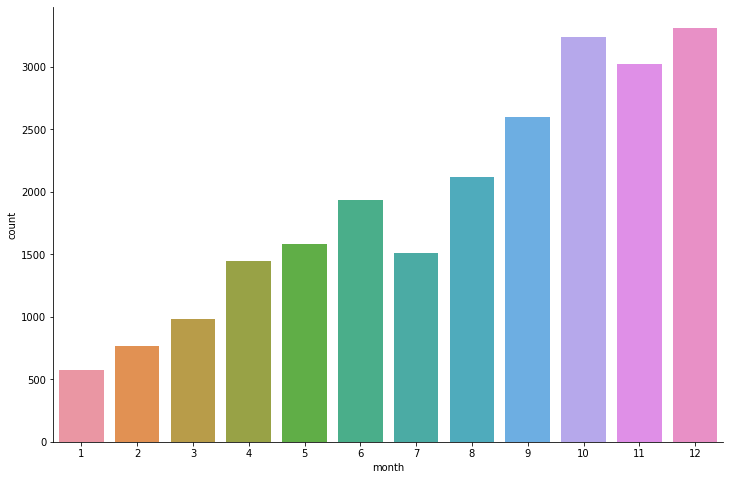

In [48]:
# Построим визуализацию распределения числа заказов по месяцам
plt.figure(figsize=(12, 8))
sns.countplot(taxi.month)
sns.despine()

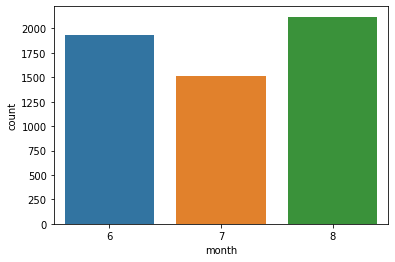

In [49]:
# Визуализация по трем месяца
taxi_month_1 = taxi.query('month in [6, 7, 8]')

ax = sns.countplot(x="month", data=taxi_month_1)

# Задание 13

А теперь – график по дням недели (`weekday`). Задать порядок столбиков на графике можно с помощью аргумента `order`, которому нужно передать список названий в нужном порядке. Например: 
```
sns.countplot(data['column'], order=['One', 'Two', 'Three'])
```
Вопрос: в какой день недели суммарно поступает меньше всего заказов? Укажите то название, которое написано в самом датафрейме.

In [50]:
# Задачу можно решить не графическим методом
# Посмотрим на распределние заказов по дням
taxi.weekday \
    .value_counts()

Monday       4018
Sunday       3752
Saturday     3569
Friday       3332
Thursday     3133
Tuesday      2965
Wednesday    2322
Name: weekday, dtype: int64

In [52]:
# Найдем день недели, когда количество заказов минимально
taxi.weekday \
    .value_counts() \
    .idxmin()

'Wednesday'

In [53]:
# Найдем названия дней недели представленных в данных
sorted(taxi.weekday.unique())

['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

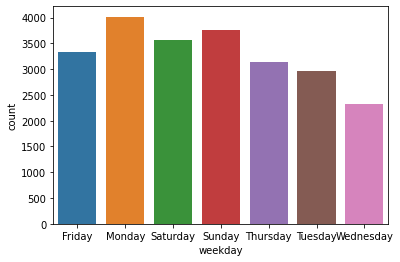

In [55]:
# Визуализируем распределнеи заказов по дням недели
sns.countplot(x="weekday", data=taxi, order=['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'])

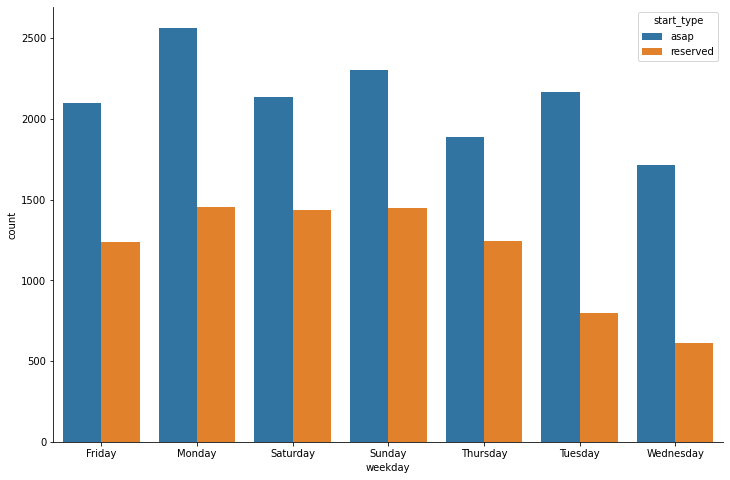

In [56]:
# Дополнительно представлена разделение по типу заказа 
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="weekday", 
                   data=taxi, 
                   order=['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'], 
                   hue='start_type')
sns.despine()

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


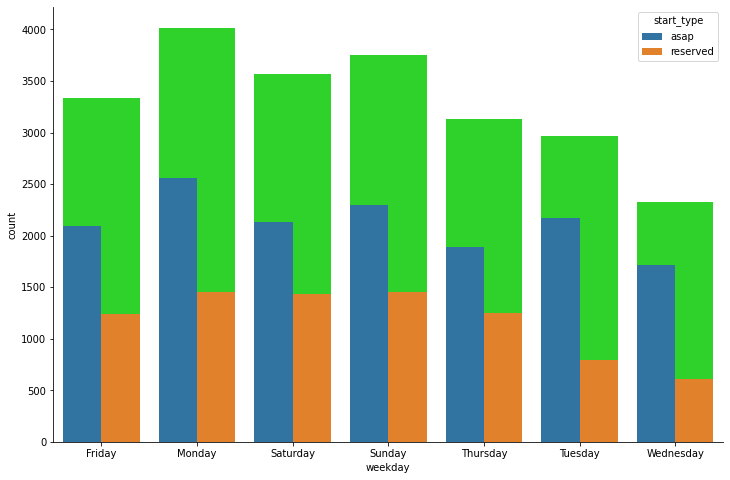

In [57]:
# Еще один вид графика, где показана суммарная составляюща и разбивка на тип
plt.figure(figsize=(12, 8))
ax = sns.countplot(taxi['weekday'], order=['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
                  palette=['#15ed0f'])
ax = sns.countplot(x="weekday", 
                   data=taxi, 
                   order=['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'], 
                   hue='start_type')
sns.despine()

# Задание 14
___
Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:

+ DAU (daily active users) – число уникальных пользователей за день
+ WAU (weekly active users) – число уникальных пользователей за неделю
+ MAU (monthly active users) – число уникальных пользователей за месяц

Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени. Постройте график MAU и выберите верные утверждения:
+ MAU за апрель примерно в 2.5 раза больше, чем за январь
+ Летом наблюдался спад числа уникальных пользователей в месяц
+ В течение всего года число уникальных пользователей увеличивалось
+ Число уникальных юзеров в течение года как увеличивалось, так и уменьшалось

In [58]:
# Посмотрим на имеющиеся данные
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,11,Tuesday
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,5,Monday
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0,9,Saturday


In [59]:
# Создадим датафрем с показателем MAU
mau = taxi \
    .groupby('month') \
    .agg({'user_id': 'nunique'})

In [60]:
# Посмотрим на получившийся датафрейм
mau

,user_id
month,
1,102
2,110
3,162
4,253
5,275
6,309
7,318
8,377
9,416


In [62]:
# Зададим массив для дальнейшего разбиения на графике
xticks = range(1, 13)

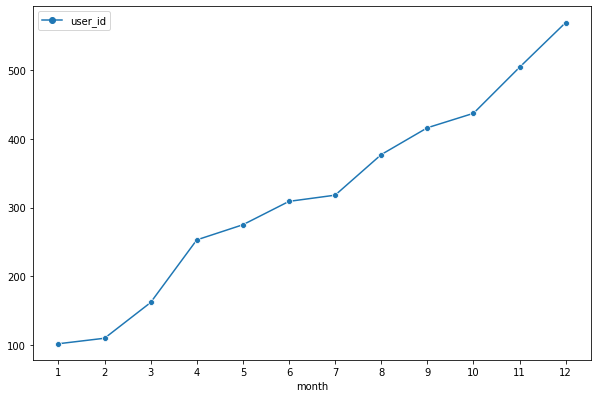

In [63]:
# Визуализируем данные
# mau.plot()
plt.figure(figsize=(10, 6.5))
sns.lineplot(data=mau, markers='o')
plt.xticks(xticks);